In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11, 7)

In [41]:
def boxplot(*args, **kwargs):
    labels = kwargs.pop('label', None)
    return sns.boxplot(*args, **kwargs)

In [65]:
financial_features =  ['salary', 'deferral_payments', 'total_payments', 
                       'loan_advances', 'bonus', 'restricted_stock_deferred', 
                       'deferred_income', 'total_stock_value', 'expenses', 
                       'exercised_stock_options', 'other', 'long_term_incentive', 
                       'restricted_stock', 'director_fees']

email_features =  ['to_messages', 'email_address', 'from_poi_to_this_person', 
                   'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

label = ['poi']

feature_names = financial_features + email_features
feature_names.remove('email_address')

data = pd.read_csv('enron_employees.csv', na_values='NaN')

In [66]:
print("Number of POIs:\t\t" + str(len(data[data.poi == True])))
print("Number of non-POIs:\t" + str(len(data[data.poi == False])))
print("Total number:\t\t" + str(len(data)))
print("Majority class ratio:")

Number of POIs:		18
Number of non-POIs:	127
Total number:		145


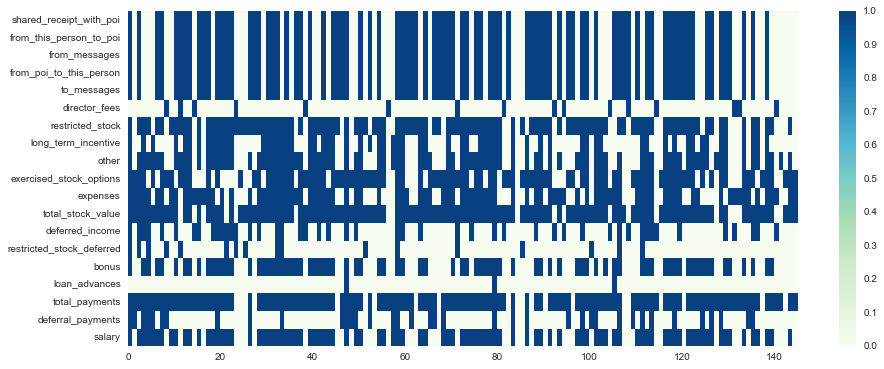

In [175]:
data_presence = np.logical_not(np.isnan(data.as_matrix(feature_names))).T
plt.figure(figsize=(15, 6))
g = plt.pcolormesh(data_presence, cmap='GnBu')
plt.xlim(0, data_presence.shape[1])
plt.ylim(0, data_presence.shape[0])
plt.colorbar()

g.axes.set_yticks(np.arange(len(feature_names)) + 0.5)
g.axes.set_yticklabels(feature_names);

In [239]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(data[feature_names], data['poi'], test_size=0.2)

In [246]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='most_frequent')
features_train_imp = imputer.fit_transform(features_train)

In [247]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features_train_imp, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [248]:
from sklearn.metrics import accuracy_score

features_test_imp = imputer.transform(features_test)
accuracy_score(labels_test, clf.predict(features_test_imp))

0.93103448275862066

In [249]:
from sklearn.metrics import confusion_matrix

In [250]:
confusion_matrix(labels_test, clf.predict(features_test_imp))

array([[25,  0],
       [ 2,  2]])